In [26]:
import numpy as np
import pandas as pd

In [27]:
df_sms = pd.read_csv(filepath_or_buffer=".\\dataset\\spam.csv", encoding="ISO-8859-1")

In [28]:
df_sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [29]:
df_sms.shape

(5572, 5)

In [30]:
df_sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [31]:
df_sms.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [32]:
df_sms.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [33]:
df_sms.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [34]:
df_sms.sample(5)

,v1,v2
1603,ham,Have you heard about that job? I'm going to th...
866,ham,"Same here, but I consider walls and bunkers an..."
1694,ham,ÌÏ eatin later but i'm eatin wif my frens now ...
5348,ham,Do I? I thought I put it back in the box
283,ham,Okie...


In [35]:
df_sms['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [36]:
df_sms = df_sms.rename(columns={"v1":"type", "v2":"sms"})

In [37]:
df_sms.sample()

,type,sms
3842,ham,Yes ammae....life takes lot of turns you can o...


In [38]:
df_sms.duplicated().sum()

403

In [39]:
df_sms.drop_duplicates(inplace=True)

In [40]:
df_sms.duplicated().sum()

0

In [41]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [42]:
plt.rcParams["figure.figsize"] = [18, 8]

In [43]:
spam_or_not = df_sms['type'].value_counts()
spam_or_not

type
ham     4516
spam     653
Name: count, dtype: int64

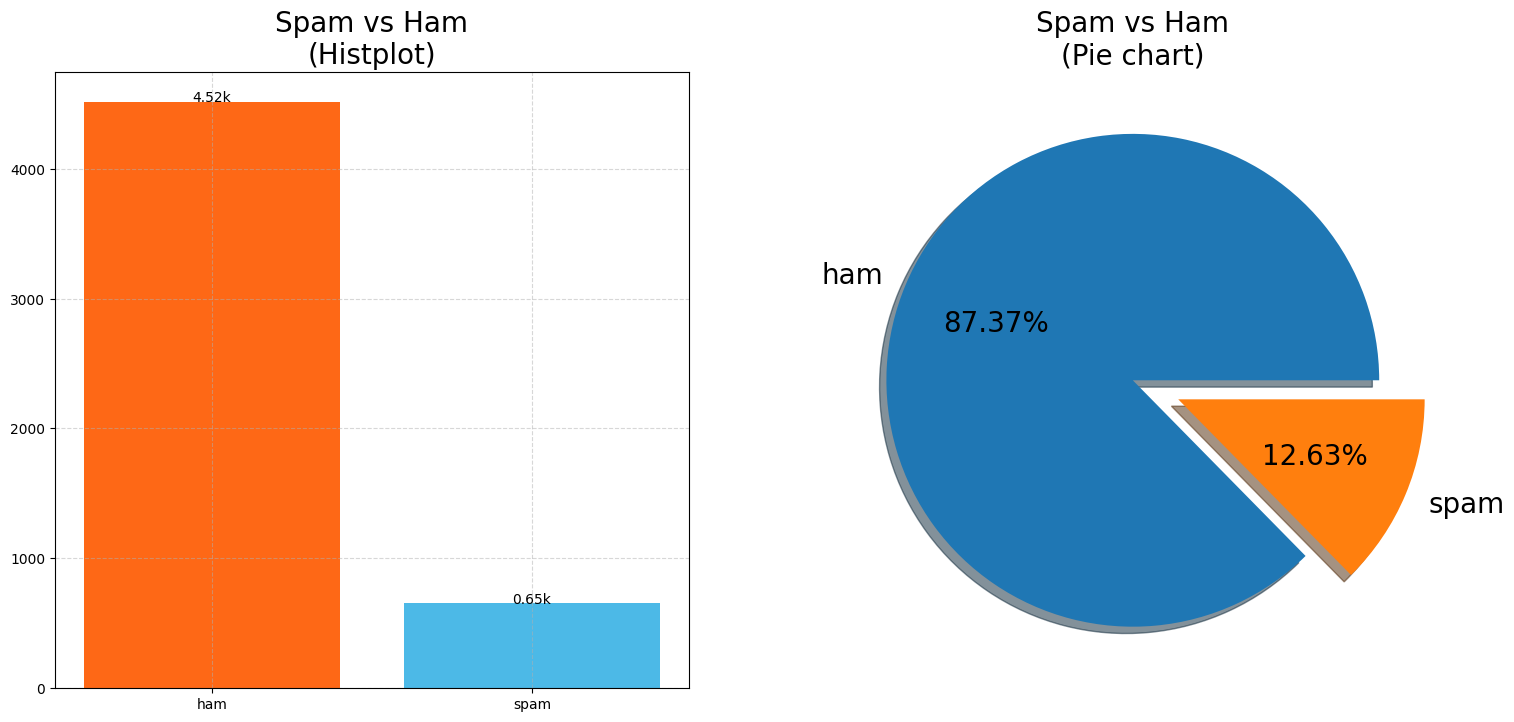

In [44]:
plt.subplot(1,2,1)
plt.bar(spam_or_not.index, spam_or_not.values, color = ["#FE6816","#4CB9E7"])
for i, value in enumerate(spam_or_not.values):
    plt.text(i, value, f"{round(value/1000, 2)}k", ha='center')
plt.grid( True, linestyle='--', alpha=0.5, zorder=0)
plt.title(label="Spam vs Ham\n(Histplot)", fontdict={"size" : "20"})

plt.subplot(1,2,2)
plt.pie(x=spam_or_not,explode=[0,0.2], shadow=True, labels=spam_or_not.index,textprops={'fontsize':20},autopct = "%.2f%%")
plt.title(label="Spam vs Ham\n(Pie chart)", fontdict={"size" : "20"})
plt.show()

In [45]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\offic\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\offic\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\offic\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\offic\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\offic\AppData\Roaming\nltk_data...
[nltk_data]    | 

True

In [46]:
# creating three more columns 
# 1. number of characters
# 2. number of words.
# 3. number of sentences.

In [47]:
df_sms['number_of_chars'] = df_sms['sms'].apply(lambda x: len(x))

In [48]:
df_sms['number_of_words'] = df_sms['sms'].apply(lambda x: len(nltk.word_tokenize(x)))

In [49]:
df_sms['number_of_sentences'] = df_sms['sms'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [50]:
df_sms.sample()

,type,sms,number_of_chars,number_of_words,number_of_sentences
1049,spam,18 days to Euro2004 kickoff! U will be kept in...,135,28,3


In [52]:
df_sms.iloc[:,2:].describe()

,number_of_chars,number_of_words,number_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [61]:
spam_v_ham = df_sms.groupby(by='type')
ham = spam_v_ham.get_group(name='ham')
spam = spam_v_ham.get_group(name='spam')

In [66]:
ham.describe()

,number_of_chars,number_of_words,number_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [64]:
spam.describe()

,number_of_chars,number_of_words,number_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [78]:
ham.describe().mean(),spam.describe().loc['mean']

(number_of_chars        716.352183
 number_of_words        601.327219
 number_of_sentences    570.275481
 dtype: float64,
 number_of_chars        137.891271
 number_of_words         27.667688
 number_of_sentences      2.970904
 Name: mean, dtype: float64)